In [1]:
import pandas as pd
import numpy as np
from numpy import log,dot,exp,shape 

# خواندن مجموعه داده
در ابتدا فایل داده ها را در اکسل قرار میدهیم به اینصورت که ابتدا ستون نوع داده و 166 ویژگی و ستون آخر که مربوط به نتیجه هست را مینویسیم که در مجموع 168 تا ستون میشوند. در اکسل در قسمت دیتا و بخش متن به ستون ، گزینه

delimeted

را انتخاب میکنیم و گزینه کاما را تیک میزنیم تا داده ها به وسیله کاما از هم جدا شوند و هر کدام در یکی از این ستونها قرار گیرند در مورد ستون اول که نوع داده هست خودش شامل کاما هست و به دو ستون تقسیم میشود. برای رفع این مشکل از ادغام دو ستون ایجاد شده استفاده میکنیم و آنها را در یک ستون ادغام میکنیم و در نهایت به جای دو ستون به وجود آمده تنها همان یک ستون را که حاوی اطلاعات نوع داده هست قرار میدهیم و در کل فایل اکسل ما به این صورت آماده میشود که برای هر دو فایل داده شده به اینصورت فایل های اکسل را ایجاد میکنیم

In [2]:
cleanData1 = pd.read_csv('cleanData1.csv')
cleanData2 = pd.read_csv('cleanData2.csv')

## محتوای فایل اول به همراه اطلاعات مجموعه داده مانند اندازه اطلاعات که برای تست مورد استفاده قرار میگیرد

In [3]:
cleanData1

type  attr1  attr2  attr3  attr4  attr5  attr6  attr7  \
0          MUSK-188,188_1+1     42   -198   -109    -75   -117     11     23   
1          MUSK-188,188_1+2     42   -191   -142    -65   -117     55     49   
2          MUSK-188,188_1+3     42   -191   -142    -75   -117     11     49   
3          MUSK-188,188_1+4     42   -198   -110    -65   -117     55     23   
4          MUSK-190,190_1+1     42   -198   -102    -75   -117     10     24   
..                      ...    ...    ...    ...    ...    ...    ...    ...   
471  NON-MUSK-jp13,jp13_1+4     49   -199   -161     29    -95    -86    -48   
472  NON-MUSK-jp13,jp13_2+1     38   -123   -139     30   -117    -88    214   
473  NON-MUSK-jp13,jp13_2+2     43   -102    -20   -101   -116    200   -166   
474  NON-MUSK-jp13,jp13_2+3     39    -58     27     31   -117    -92     85   
475  NON-MUSK-jp13,jp13_2+4     52   -121    -24   -104   -116    195   -162   

     attr8  attr9  ...  attr158  attr159  attr160  attr161  attr162  attr163  \
0      -88    -28  ...      -74     -129     -120      -38       30       48   
1     -170    -45  ...     -302       60     -120      -39       31       48   
2     -161    -45  ...      -73     -127     -120      -38       30       48   
3      -95    -28  ...     -302       60     -120      -39       30       48   
4      -87    -28  ...      -73     -127       51      128      144       43   
..     ...    ...  ...      ...      ...      ...      ...      ...      ...   
471      2    112  ...     -246     -209       33      152      134       47   
472    -13    -74  ...     -226     -210       20       55      119       79   
473     66   -222  ...       32      136      -15      143      121       55   
474     21    -73  ...     -232     -206       13       45      116       79   
475     76   -226  ...       34      133      -20      -46       95       98   

     attr164  attr165  attr166  result  
0        -37        6       30       1  
1        -37        5       30       1  
2        -37        5       31       1  
3        -37        6       30       1  
4        -30       14       26       1  
..       ...      ...      ...     ...  
471      -43      -15      -10       0  
472      -28        4       74       0  
473      -37      -19      -36       0  
474      -28        3       74       0  
475      -14       12       96       0  

[476 rows x 168 columns]

In [4]:
print(cleanData1.shape)
cleanData1.describe()

(476, 168)


attr1       attr2       attr3       attr4       attr5       attr6  \
count  476.000000  476.000000  476.000000  476.000000  476.000000  476.000000   
mean    38.731092 -120.142857  -79.243697   15.903361 -112.298319   -9.760504   
std     18.087948   88.313464   69.172519   75.515959   28.704947   92.025496   
min     -9.000000 -199.000000 -166.000000 -115.000000 -117.000000 -184.000000   
25%     31.000000 -193.000000 -144.000000  -53.000000 -117.000000  -89.000000   
50%     42.000000 -144.500000 -108.000000   28.000000 -117.000000   11.000000   
75%     50.000000 -101.000000  -21.000000   38.000000 -117.000000   70.250000   
max    130.000000   98.000000   83.000000  157.000000  238.000000  200.000000   

            attr7       attr8       attr9      attr10  ...     attr158  \
count  476.000000  476.000000  476.000000  476.000000  ...  476.000000   
mean   -16.628151    7.762605  -91.048319  -76.077731  ... -204.405462   
std    106.560891   75.786461   96.321303   72.467693  ...   89.566426   
min   -170.000000 -231.000000 -242.000000 -284.000000  ... -324.000000   
25%   -159.000000   -9.250000 -215.000000 -118.250000  ... -264.000000   
50%     41.000000   18.000000  -41.000000  -73.500000  ... -236.000000   
75%     51.000000   57.000000  -30.000000  -28.000000  ... -154.750000   
max    214.000000  188.000000  135.000000  218.000000  ...   72.000000   

          attr159     attr160     attr161     attr162     attr163     attr164  \
count  476.000000  476.000000  476.000000  476.000000  476.000000  476.000000   
mean  -108.262605  -25.231092   37.428571   79.752101   85.363445  -34.128151   
std    121.794583   65.588295   87.315888   49.269244   47.487575   16.019277   
min   -217.000000 -135.000000 -126.000000  -78.000000   35.000000 -132.000000   
25%   -208.000000  -91.000000  -39.250000   33.000000   54.000000  -42.250000   
50%   -189.500000  -15.000000   31.500000   84.000000   69.000000  -36.000000   
75%     30.000000   22.000000  128.000000  119.000000   99.000000  -28.000000   
max    173.000000  185.000000  253.000000  291.000000  302.000000   24.000000   

          attr165     attr166      result  
count  476.000000  476.000000  476.000000  
mean   -26.241597   33.714286    0.434874  
std     58.009205   54.189087    0.496262  
min   -258.000000  -72.000000    0.000000  
25%    -28.000000  -12.000000    0.000000  
50%    -11.000000   35.000000    0.000000  
75%      7.000000   74.000000    1.000000  
max     82.000000  235.000000    1.000000  

[8 rows x 167 columns]

####  همچنین میتوان بر روی داده ها فیلترینگ اعمال کرد مثلا فقط داده هایی را نشان دهد که نتیجه آنها 1 هست و یا 0 به علاوه میتوان به جای نشان دادن همه مجموعه داده تنها چند نمونه اول را نشان داد

In [5]:
cleanData1[cleanData1['result'] == 0].head()

type  attr1  attr2  attr3  attr4  attr5  attr6  attr7  \
207  NON-MUSK-199,199_1+1     40    -39     30   -113   -115   -178   -159   
208  NON-MUSK-199,199_1+2     36   -198   -166    138   -116    112   -155   
209  NON-MUSK-199,199_1+3     43     69     30   -115   -117   -179   -151   
210  NON-MUSK-199,199_1+4     36   -198   -166    139   -116    112   -154   
211  NON-MUSK-200,200_1+1     24     80     29    -69   -115     22   -141   

     attr8  attr9  ...  attr158  attr159  attr160  attr161  attr162  attr163  \
207     67   -231  ...     -294     -207      115       69       41      121   
208     72   -219  ...     -305     -213      -91      135       96      102   
209    -28   -191  ...     -241     -209       61       62       15      150   
210     -9   -213  ...     -251     -213      -91      136       96      102   
211   -226   -238  ...      -73     -116       28       24       32       46   

     attr164  attr165  attr166  result  
207      -42     -102      -49       0  
208      -46      -81      -43       0  
209      -42     -141      -29       0  
210      -46      -80      -43       0  
211      -30       24       25       0  

[5 rows x 168 columns]

In [6]:
cleanData1[cleanData1['result'] == 1].head()

type  attr1  attr2  attr3  attr4  attr5  attr6  attr7  attr8  \
0  MUSK-188,188_1+1     42   -198   -109    -75   -117     11     23    -88   
1  MUSK-188,188_1+2     42   -191   -142    -65   -117     55     49   -170   
2  MUSK-188,188_1+3     42   -191   -142    -75   -117     11     49   -161   
3  MUSK-188,188_1+4     42   -198   -110    -65   -117     55     23    -95   
4  MUSK-190,190_1+1     42   -198   -102    -75   -117     10     24    -87   

   attr9  ...  attr158  attr159  attr160  attr161  attr162  attr163  attr164  \
0    -28  ...      -74     -129     -120      -38       30       48      -37   
1    -45  ...     -302       60     -120      -39       31       48      -37   
2    -45  ...      -73     -127     -120      -38       30       48      -37   
3    -28  ...     -302       60     -120      -39       30       48      -37   
4    -28  ...      -73     -127       51      128      144       43      -30   

   attr165  attr166  result  
0        6       30       1  
1        5       30       1  
2        5       31       1  
3        6       30       1  
4       14       26       1  

[5 rows x 168 columns]

## محتوای فایل دوم به همراه اطلاعات مجموعه داده مانند اندازه اطلاعات که برای آموزش مورد استفاده قرار میگیرد

In [7]:
cleanData2

type  attr1  attr2  attr3  attr4  attr5  attr6  attr7  \
0           MUSK-211,211_1+1     46   -108    -60    -69   -117     49     38   
1          MUSK-211,211_1+10     41   -188   -145     22   -117     -6     57   
2          MUSK-211,211_1+11     46   -194   -145     28   -117     73     57   
3          MUSK-211,211_1+12     41   -188   -145     22   -117     -7     57   
4          MUSK-211,211_1+13     41   -188   -145     22   -117     -7     57   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
6593  NON-MUSK-jp13,jp13_2+5     51   -123    -23   -108   -117    134   -160   
6594  NON-MUSK-jp13,jp13_2+6     44   -104    -19   -105   -117    142   -165   
6595  NON-MUSK-jp13,jp13_2+7     44   -102    -19   -104   -117     72   -165   
6596  NON-MUSK-jp13,jp13_2+8     51   -121    -23   -106   -117     63   -161   
6597  NON-MUSK-jp13,jp13_2+9     51   -122    -23   -106   -117    190   -161   

      attr8  attr9  ...  attr158  attr159  attr160  attr161  attr162  attr163  \
0      -161     -8  ...     -308       52       -7       39      126      156   
1      -171    -39  ...      -59       -2       52      103      136      169   
2      -168    -39  ...     -134     -154       57      143      142      165   
3      -170    -39  ...      -60       -4       52      104      136      168   
4      -170    -39  ...      -60       -4       52      104      137      168   
...     ...    ...  ...      ...      ...      ...      ...      ...      ...   
6593     82   -230  ...      -66      164      -14      -29      107      171   
6594     68   -225  ...      -51      166       -9      150      129      158   
6595     65   -219  ...       90      117       -8      150      130      159   
6596     79   -224  ...       86       99      -14      -31      106      171   
6597     80   -227  ...       40      124      -14      -30      107      171   

      attr164  attr165  attr166  result  
0         -50     -112       96       1  
1         -61     -136       79       1  
2         -67     -145       39       1  
3         -60     -135       80       1  
4         -60     -135       80       1  
...       ...      ...      ...     ...  
6593      -44     -115      118       0  
6594      -66     -144       -5       0  
6595      -66     -144       -6       0  
6596      -44     -116      117       0  
6597      -44     -115      118       0  

[6598 rows x 168 columns]

In [8]:
print(cleanData2.shape)
cleanData2.describe()

(6598, 168)


attr1        attr2        attr3        attr4        attr5  \
count  6598.000000  6598.000000  6598.000000  6598.000000  6598.000000   
mean     58.945135  -119.128524   -73.146560    -0.628372  -103.533495   
std      53.249007    90.813375    67.956235    80.444617    64.387559   
min     -31.000000  -199.000000  -167.000000  -114.000000  -118.000000   
25%      37.000000  -193.000000  -137.000000   -70.000000  -117.000000   
50%      44.000000  -149.000000   -99.000000   -25.000000  -117.000000   
75%      53.000000   -95.000000   -19.000000    42.000000  -116.000000   
max     292.000000    95.000000    81.000000   161.000000   325.000000   

             attr6        attr7        attr8        attr9       attr10  ...  \
count  6598.000000  6598.000000  6598.000000  6598.000000  6598.000000  ...   
mean     18.359806   -14.108821    -1.858290   -86.003031   -44.495756  ...   
std      80.593655   115.315673    90.372537   108.326676    72.088903  ...   
min    -183.000000  -171.000000  -225.000000  -245.000000  -286.000000  ...   
25%     -28.000000  -159.000000   -85.000000  -217.000000   -96.750000  ...   
50%      33.000000    27.000000    19.000000   -40.000000   -29.000000  ...   
75%      74.000000    57.000000    61.000000   -21.000000     4.000000  ...   
max     200.000000   220.000000   320.000000   147.000000   231.000000  ...   

           attr158      attr159      attr160      attr161      attr162  \
count  6598.000000  6598.000000  6598.000000  6598.000000  6598.000000   
mean   -184.798272   -75.795696   -26.073204    64.616702   112.037739   
std     107.819514   127.861271    69.727964   100.861935    72.835040   
min    -328.000000  -219.000000  -136.000000  -120.000000   -69.000000   
25%    -272.000000  -205.000000   -70.000000   -18.000000    71.000000   
50%    -234.000000  -131.000000   -21.000000    61.500000   107.000000   
75%     -80.000000    52.000000     9.000000   149.000000   129.000000   
max      94.000000   179.000000   192.000000   411.000000   355.000000   

           attr163      attr164      attr165      attr166       result  
count  6598.000000  6598.000000  6598.000000  6598.000000  6598.000000  
mean    201.760230   -47.488330  -150.259927    41.770233     0.154138  
std      59.526751    55.069365    76.019023    94.116085     0.361108  
min      73.000000  -289.000000  -428.000000  -471.000000     0.000000  
25%     166.000000   -68.000000  -179.000000    -9.000000     0.000000  
50%     191.000000   -60.000000  -150.000000    27.000000     0.000000  
75%     215.000000   -45.000000  -120.000000   119.000000     0.000000  
max     625.000000   295.000000   168.000000   367.000000     1.000000  

[8 rows x 167 columns]

In [9]:
cleanData2[cleanData2['result'] == 0].head()

type  attr1  attr2  attr3  attr4  attr5  attr6  attr7  \
1017    NON-MUSK-192,192_1+1    114     61   -144    -77   -117     11     56   
1018   NON-MUSK-192,192_1+10    112     59   -144    -77   -117     11     56   
1019  NON-MUSK-192,192_1+100    141   -193   -145    -70   -117     53     57   
1020  NON-MUSK-192,192_1+101    112     59   -145    -69   -117     52     56   
1021  NON-MUSK-192,192_1+102    141   -193   -144    -69   -117     52     57   

      attr8  attr9  ...  attr158  attr159  attr160  attr161  attr162  attr163  \
1017   -165    -40  ...      -81     -137       34      254      290      143   
1018   -164    -40  ...      -80     -136       36      255      290      143   
1019   -171    -40  ...     -302       56       52      209      282      142   
1020   -169    -40  ...     -304       55       36      255      290      143   
1021   -171    -40  ...     -302       56       55      208      280      142   

      attr164  attr165  attr166  result  
1017      -58     -117       60       0  
1018      -58     -117       60       0  
1019      -60     -120       48       0  
1020      -58     -117       60       0  
1021      -59     -119       49       0  

[5 rows x 168 columns]

In [10]:
cleanData2[cleanData2['result'] == 1].head()

type  attr1  attr2  attr3  attr4  attr5  attr6  attr7  attr8  \
0   MUSK-211,211_1+1     46   -108    -60    -69   -117     49     38   -161   
1  MUSK-211,211_1+10     41   -188   -145     22   -117     -6     57   -171   
2  MUSK-211,211_1+11     46   -194   -145     28   -117     73     57   -168   
3  MUSK-211,211_1+12     41   -188   -145     22   -117     -7     57   -170   
4  MUSK-211,211_1+13     41   -188   -145     22   -117     -7     57   -170   

   attr9  ...  attr158  attr159  attr160  attr161  attr162  attr163  attr164  \
0     -8  ...     -308       52       -7       39      126      156      -50   
1    -39  ...      -59       -2       52      103      136      169      -61   
2    -39  ...     -134     -154       57      143      142      165      -67   
3    -39  ...      -60       -4       52      104      136      168      -60   
4    -39  ...      -60       -4       52      104      137      168      -60   

   attr165  attr166  result  
0     -112       96       1  
1     -136       79       1  
2     -145       39       1  
3     -135       80       1  
4     -135       80       1  

[5 rows x 168 columns]

# پیش پردازش داده ها
#### در ابتدا بایستی ستون اول یعنی نوع را حذف کرد زیرا برای پیش بینی به کار نمی آید

In [11]:
cleanData1.drop(columns='type', inplace=True)
cleanData2.drop(columns='type', inplace=True)

In [12]:
cleanData1

attr1  attr2  attr3  attr4  attr5  attr6  attr7  attr8  attr9  attr10  \
0       42   -198   -109    -75   -117     11     23    -88    -28     -27   
1       42   -191   -142    -65   -117     55     49   -170    -45       5   
2       42   -191   -142    -75   -117     11     49   -161    -45     -28   
3       42   -198   -110    -65   -117     55     23    -95    -28       5   
4       42   -198   -102    -75   -117     10     24    -87    -28     -28   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
471     49   -199   -161     29    -95    -86    -48      2    112     -79   
472     38   -123   -139     30   -117    -88    214    -13    -74    -129   
473     43   -102    -20   -101   -116    200   -166     66   -222     -49   
474     39    -58     27     31   -117    -92     85     21    -73     -68   
475     52   -121    -24   -104   -116    195   -162     76   -226     -56   

     ...  attr158  attr159  attr160  attr161  attr162  attr163  attr164  \
0    ...      -74     -129     -120      -38       30       48      -37   
1    ...     -302       60     -120      -39       31       48      -37   
2    ...      -73     -127     -120      -38       30       48      -37   
3    ...     -302       60     -120      -39       30       48      -37   
4    ...      -73     -127       51      128      144       43      -30   
..   ...      ...      ...      ...      ...      ...      ...      ...   
471  ...     -246     -209       33      152      134       47      -43   
472  ...     -226     -210       20       55      119       79      -28   
473  ...       32      136      -15      143      121       55      -37   
474  ...     -232     -206       13       45      116       79      -28   
475  ...       34      133      -20      -46       95       98      -14   

     attr165  attr166  result  
0          6       30       1  
1          5       30       1  
2          5       31       1  
3          6       30       1  
4         14       26       1  
..       ...      ...     ...  
471      -15      -10       0  
472        4       74       0  
473      -19      -36       0  
474        3       74       0  
475       12       96       0  

[476 rows x 167 columns]

In [13]:
cleanData2

attr1  attr2  attr3  attr4  attr5  attr6  attr7  attr8  attr9  attr10  \
0        46   -108    -60    -69   -117     49     38   -161     -8       5   
1        41   -188   -145     22   -117     -6     57   -171    -39    -100   
2        46   -194   -145     28   -117     73     57   -168    -39     -22   
3        41   -188   -145     22   -117     -7     57   -170    -39     -99   
4        41   -188   -145     22   -117     -7     57   -170    -39     -99   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
6593     51   -123    -23   -108   -117    134   -160     82   -230     -28   
6594     44   -104    -19   -105   -117    142   -165     68   -225     -32   
6595     44   -102    -19   -104   -117     72   -165     65   -219     -12   
6596     51   -121    -23   -106   -117     63   -161     79   -224     -30   
6597     51   -122    -23   -106   -117    190   -161     80   -227     -52   

      ...  attr158  attr159  attr160  attr161  attr162  attr163  attr164  \
0     ...     -308       52       -7       39      126      156      -50   
1     ...      -59       -2       52      103      136      169      -61   
2     ...     -134     -154       57      143      142      165      -67   
3     ...      -60       -4       52      104      136      168      -60   
4     ...      -60       -4       52      104      137      168      -60   
...   ...      ...      ...      ...      ...      ...      ...      ...   
6593  ...      -66      164      -14      -29      107      171      -44   
6594  ...      -51      166       -9      150      129      158      -66   
6595  ...       90      117       -8      150      130      159      -66   
6596  ...       86       99      -14      -31      106      171      -44   
6597  ...       40      124      -14      -30      107      171      -44   

      attr165  attr166  result  
0        -112       96       1  
1        -136       79       1  
2        -145       39       1  
3        -135       80       1  
4        -135       80       1  
...       ...      ...     ...  
6593     -115      118       0  
6594     -144       -5       0  
6595     -144       -6       0  
6596     -116      117       0  
6597     -115      118       0  

[6598 rows x 167 columns]

#### حالا باید مقادیر از دست رفته را مدیریت کنیم که البته با توجه به فایل های دیتا ، اطلاعات کلین شده هستند اما در هر صورت اگر فرض کنیم که مقادیر از دست رفته با ؟ نشان داده میشوند به طریق زیر میتوان آنها را حذف کرد و مقدار غیر عددی را جایگزین کرد

In [14]:
cleanData1.replace(to_replace='?', value=np.nan, inplace=True)
cleanData2.replace(to_replace='?', value=np.nan, inplace=True)

#### نمودارهای زیر هم همبستگی بین ویژگی ها را نشان میدهد که هر چه بیشتر باشد رو به قرمز رنگ میرود و هر چه کمتر باشد رو به رنگ آبی میرود

In [15]:
cleanData1_cc = cleanData1.dropna()
corr = cleanData1_cc.astype('float64').corr()
corr.style.background_gradient(cmap='coolwarm')

In [16]:
cleanData2_cc = cleanData2.dropna()
corr = cleanData2_cc.astype('float64').corr()
corr.style.background_gradient(cmap='coolwarm')

#### حال چک میکنیم که آیا در این همبستگی مقدار نال پیدا میشود یا خیر و این کار برای این است که مطمعن شویم تا مقدار نال وجود نداشته باشد

In [17]:
cleanData1_cc.isnull().values.any()

False

In [18]:
cleanData2_cc.isnull().values.any()

False

# تقسیم کردن داده ها به ویژگی ایکس و تارگت وای
####  ایکس باید به صورت ابعاد (تعداد داده اموزشی * تعداد ویژگی) باشد
#### وای هم باید به صورت ابعاد (تعداد داده آموزشی * 1) باشد

In [19]:
x_training = cleanData2.iloc[:,:-1].values
y_train = cleanData2.iloc[:,-1].values
x_testing = cleanData1.iloc[:,:-1].values
y_test = cleanData1.iloc[:,-1].values

# نرمالایز کردن داده ها

#### در ابتدا توضیح میدهیم که اصلا چه نیازی به نرمال سازی داده ها داریم :
#### در مورد محاسبه تابع گمشدگی و هزینه ، اگر داده ها را نرمالایز نمیکردیم با توجه به اعداد در داده ها که از لحاظ عددی بزرگ هستند وقتی که در وزنها ضرب میشوند و در نهایت از ان سیگموید گرفته میشود مقدار ان میتواند بسیار بسیار کوچک شود و اگر مثلا مقدار ان را با عددی جمع کنیم کامپیوتر به ما حاصل همان عدد را میدهد یعنی گویا چیزی به ان اضافه نشده است زیرا مقدار بسیار کوچکی هست به همین دلیل برخی مقادیر را صفر در نظر میگیرد و برخی مقادیر هم اینقدر بزرگ هستند که انها را بینهایت در نظر میگیرد. برخی هم وقتی در فرمول میزان خطا میخواهد حساب شود و از ان لوگ گرفته میشود مقدار ان بسیار بزرگ میشود. برای محاسبه تابع هزینه هم با توجه به اینکه برخی مقادیر بینهایت هستند نمیتوان مقدار عددی ان را حساب کرد. همچنین نکته دیگر این است که ممکن است مقادیر یک ویژگی در بازه عددی بزرگی باشند و مقادیر ویژگی دیگری در بازه عددی کوچک و در نتیجه ممکن است مجالی به این ویزگی با مقادیر کوچک داده نشود. و در نتیجه به خاطر این دلایل ذکر شده بایستی که داده ها را نرمالایز کنیم و بایستی برای هر ویژگی ، مقادیر ان را نرمالایز کنیم و بهترین و متداول ترین کار این است که در بازه 0 و 1 انها را نرمالایز کنیم 

#### نحوه نرمالایز کردن از طریق فرمول زیر انجام میشود
#### X' = [ (X - Xmin) / (Xmax - Xmin) ] * (u - l) + l
#### X': normalized data       X: original data    Xmin: minimum values of the original data    Xmax: maximum values of the original data    u: upper values of new range (in this case is 1)    l:  lower values of new range (in this case is 0) 
#### فرمول ساده تر شده با فرض اینکه میخواهیم نرمالایز در بازه 0و1 انجام دهیم به صورت زیر میشود
#### X' = X' = [ (X - Xmin) / (Xmax - Xmin) ]

In [20]:
x_training = x_training.astype('float64')
x_training

array([[  46., -108.,  -60., ...,  -50., -112.,   96.],
       [  41., -188., -145., ...,  -61., -136.,   79.],
       [  46., -194., -145., ...,  -67., -145.,   39.],
       ...,
       [  44., -102.,  -19., ...,  -66., -144.,   -6.],
       [  51., -121.,  -23., ...,  -44., -116.,  117.],
       [  51., -122.,  -23., ...,  -44., -115.,  118.]])

In [21]:
max_x_training = x_training.max(axis=0)
max_x_training

array([292.,  95.,  81., 161., 325., 200., 220., 320., 147., 231., 176.,
       184., 195., 158., 172.,  80., 138., 189., 225., 227., 194., 190.,
       213., 317., 277., 183., 164., 145., 174., 266., 309., 310., 207.,
       160., 220., 324., 147., 187., 107., 194.,  90., 367., 225., 198.,
       147., 161., 110., 179., 273., 215., 172., 177., 169., 335., 269.,
       214., 229., 113., 200., 200., 254., 180., 284., 225., 112., 315.,
       234., 149., 232., 158.,  86.,  99., 181., 172., 203.,  21., 156.,
       235., 193., 309., 198., 201., 175., 273., 193., 194., 109., 172.,
       152., 269., 235., 306., 223., 184., 238., 347., 165., 203.,  40.,
       237.,  91., 348., 173., 191., 154., 212., 159., 167., 200., 141.,
       209., 214., 194., 180., 216., 253., 315., 156., 209., 152., 267.,
       258., 276., 227., 299., 308., 219., 241., 206., 122., 281., 255.,
       176., 169., 219., 125., 186., 130., 202., 203., 188., 184., 239.,
       208., 213., 261., 172., 130., 117., 185., 24

In [22]:
min_x_training = x_training.min(axis=0)
min_x_training

array([ -31., -199., -167., -114., -118., -183., -171., -225., -245.,
       -286., -328., -321., -305., -342., -294., -327., -224., -308.,
       -286., -252., -295., -185., -253.,  -76., -100., -242., -205.,
       -166., -142., -162., -117., -143., -139., -279., -160.,   -7.,
       -175., -190., -148., -180., -188., -150., -295., -343., -310.,
       -340., -159., -290., -265., -279., -326., -206., -206., -147.,
       -112., -279., -170., -178., -172., -250., -102., -196., -100.,
       -195., -165.,   -9., -167., -195., -134., -191., -174., -152.,
       -324., -333., -274., -195., -259., -313., -306., -202., -255.,
       -175., -299.,  -98., -220., -203., -207., -213., -111., -157.,
       -202.,  -16., -125., -328., -119.,  -69., -191., -190., -157.,
       -156., -209.,  -33., -299., -324., -319., -284., -200., -292.,
       -249., -291., -250., -266., -224., -204., -250., -257., -103.,
       -212., -196., -201., -121., -117., -129., -127., -144.,  -69.,
       -286., -221.,

In [23]:
number_datas , number_features = x_training.shape
for i in range(number_features):
    for j in range(number_datas):
        x_training[j,i] = (x_training[j,i] - min_x_training[i]) / (max_x_training[i] - min_x_training[i])

In [24]:
x_training

array([[0.23839009, 0.30952381, 0.43145161, ..., 0.40924658, 0.53020134,
        0.67661098],
       [0.22291022, 0.03741497, 0.08870968, ..., 0.39041096, 0.48993289,
        0.65632458],
       [0.23839009, 0.0170068 , 0.08870968, ..., 0.38013699, 0.47483221,
        0.60859189],
       ...,
       [0.23219814, 0.32993197, 0.59677419, ..., 0.38184932, 0.47651007,
        0.5548926 ],
       [0.25386997, 0.26530612, 0.58064516, ..., 0.41952055, 0.52348993,
        0.70167064],
       [0.25386997, 0.26190476, 0.58064516, ..., 0.41952055, 0.52516779,
        0.70286396]])

In [25]:
x_train = x_training.T
x_train

array([[0.23839009, 0.22291022, 0.23839009, ..., 0.23219814, 0.25386997,
        0.25386997],
       [0.30952381, 0.03741497, 0.0170068 , ..., 0.32993197, 0.26530612,
        0.26190476],
       [0.43145161, 0.08870968, 0.08870968, ..., 0.59677419, 0.58064516,
        0.58064516],
       ...,
       [0.40924658, 0.39041096, 0.38013699, ..., 0.38184932, 0.41952055,
        0.41952055],
       [0.53020134, 0.48993289, 0.47483221, ..., 0.47651007, 0.52348993,
        0.52516779],
       [0.67661098, 0.65632458, 0.60859189, ..., 0.5548926 , 0.70167064,
        0.70286396]])

In [26]:
x_train.shape

(166, 6598)

In [27]:
y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
x_testing = x_testing.astype('float64')
x_testing

array([[  42., -198., -109., ...,  -37.,    6.,   30.],
       [  42., -191., -142., ...,  -37.,    5.,   30.],
       [  42., -191., -142., ...,  -37.,    5.,   31.],
       ...,
       [  43., -102.,  -20., ...,  -37.,  -19.,  -36.],
       [  39.,  -58.,   27., ...,  -28.,    3.,   74.],
       [  52., -121.,  -24., ...,  -14.,   12.,   96.]])

In [29]:
max_x_testing = x_testing.max(axis=0)
max_x_testing

array([130.,  98.,  83., 157., 238., 200., 214., 188., 135., 218., 104.,
       196., 117.,  72.,  77.,  13., 125., 139., 214., 273., 196., 147.,
       187., 312., 254., 162., 157., 147., 181., 258., 190., 143., 219.,
       163., 227., 291., 224., 165., 105., 189.,  82., 201., 168.,  81.,
        65., 115., 110.,  99., 180., 214., 218., 148., 159., 286., 259.,
       199., 231., 111., 181., 178., 243., 173., 110., 220., 108., 197.,
       262., 157., 205., 168.,  83.,  98., 133., 112., 132., -65., 154.,
       158., 185., 233., 183., 192., 208., 251., 183., 189., 113., 105.,
       163., 272., 168., 167., 233., 178., 149., 336., 171., 194.,  48.,
       235.,  88., 265.,  96.,  95.,  72., 179., 144.,  52., 183.,  53.,
       117., 211., 188., 160., 201., 187., 315., 137., 215., 152., 254.,
       270., 279., 200., 149., 137., 123., 238., 159., 152., 140., 170.,
       176., 187., 111., 137., 186., 127., 138., 207., 238., 177., 213.,
       158., 178., 240.,  -3., 134., 121., 174., 24

In [30]:
min_x_testing = x_testing.min(axis=0)
min_x_testing

array([  -9., -199., -166., -115., -117., -184., -170., -231., -242.,
       -284., -327., -326., -302., -348., -292., -318., -225., -312.,
       -291., -243., -298., -187., -255.,  -70., -102., -243., -205.,
       -164., -140., -154., -118., -149., -124., -278., -156.,   16.,
       -175., -192., -145., -181., -190., -151., -291., -343., -315.,
       -338., -157., -294., -269., -273., -329., -205., -206., -143.,
       -113., -282., -168., -178., -173., -254., -102., -195.,  -69.,
       -197., -159.,    6., -166., -196., -134., -192., -174., -150.,
       -322., -338., -272., -191., -255., -318., -310., -197., -258.,
       -176., -301.,  -98., -222., -200., -208., -213., -111., -159.,
       -202.,  -20., -121., -326.,  -77.,  -70., -191., -191., -155.,
       -155., -210.,  -37., -296., -320., -319., -287., -194., -293.,
       -250., -295., -252., -268., -223., -206., -251., -252., -104.,
       -209., -193., -201., -123., -118., -131., -121., -145.,  -44.,
       -285., -219.,

In [31]:
number_datas , number_features = x_testing.shape
for i in range(number_features):
    for j in range(number_datas):
        x_testing[j,i] = (x_testing[j,i] - min_x_testing[i]) / (max_x_testing[i] - min_x_testing[i])

In [32]:
x_testing

array([[0.36690647, 0.003367  , 0.22891566, ..., 0.60897436, 0.77647059,
        0.33224756],
       [0.36690647, 0.02693603, 0.09638554, ..., 0.60897436, 0.77352941,
        0.33224756],
       [0.36690647, 0.02693603, 0.09638554, ..., 0.60897436, 0.77352941,
        0.33550489],
       ...,
       [0.37410072, 0.32659933, 0.58634538, ..., 0.60897436, 0.70294118,
        0.11726384],
       [0.34532374, 0.47474747, 0.7751004 , ..., 0.66666667, 0.76764706,
        0.47557003],
       [0.43884892, 0.26262626, 0.57028112, ..., 0.75641026, 0.79411765,
        0.54723127]])

In [33]:
x_test = x_testing.T
x_test

array([[0.36690647, 0.36690647, 0.36690647, ..., 0.37410072, 0.34532374,
        0.43884892],
       [0.003367  , 0.02693603, 0.02693603, ..., 0.32659933, 0.47474747,
        0.26262626],
       [0.22891566, 0.09638554, 0.09638554, ..., 0.58634538, 0.7751004 ,
        0.57028112],
       ...,
       [0.60897436, 0.60897436, 0.60897436, ..., 0.60897436, 0.66666667,
        0.75641026],
       [0.77647059, 0.77352941, 0.77352941, ..., 0.70294118, 0.76764706,
        0.79411765],
       [0.33224756, 0.33224756, 0.33550489, ..., 0.11726384, 0.47557003,
        0.54723127]])

In [34]:
x_test.shape

(166, 476)

In [35]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# logistic Regression
برای پیاده سازی کارامد و بهینه تر رگرسیون لجستیک میتوان کلاسی ایجاد کرد که شامل توابع اولیه برای مقداردهی اولیه به متغیرها ، تابع فیت برای انجام محسابات که از طریق محاسبه مشتقات زنجیره ای فرمول های نوشته شده به دست آمده اند و همچنین پیاده سازی حلقه فور 
برای انجام ایپاک ها ، و تابع پردیکشن به منظور مشاهده نتایج خروجی و تعیین کلاس هست
همچنین در مورد ترم بایاس و توضیحات سوال میتوان اینگونه برداشت کرد که با توجه به اینکه هر نرون میتواند مقدار بایاس ای داشته باشد فرض کرده ایم که متغیر بولین برای بایاس داریم و اگر فالس باشد که مقدار اولیه بایاس ها صفر هست و گویی در ابتدای کار بایاسی نداریم و به مدل خود ترم بایاس اضافه نکرده ایم و در صورتیکه این متغیر ترو باشد مفدار 
اولیه بایاس ها را عددی رندوم قرار میدهیم پس ابعاد بایاس ها (تعداد نمونه آموزشی * 1) هست
توجه شود که میتوان به صورت دیگری هم فرض کرد و ان است که اگر متغیر بولین فالس باشد کلا در فرمول به روز رسانی هیچ ترم بایاسی ننویسیم در اینصورت میتوان در قسمت ایف اگر شرط درست در امد که همین پیاده سازی نوشته شده را بنویسیم و در قسمت الس که شرط غلط در می اید یعنی متغیر بولین فالس است همان کدهای به روزرسانی را بنویسیم فقط ترم بایاس را در ان دخیل ندهیم
بنابراین به هر دو صورت میتوان ان را نوشت اما طبق مباحث گفته شده در کلاس و اصولی تر این هست که ترم بایاس بایستی در فرمول وجود داشته باشد و در مورد مقداردهی اولیه ان  مختاریم که ان را صفر قرار دهیم و یا عددی رندوم دهیم همچنین باید توجه کرد که مقادیر بایاس برای هر داده اموزشی فرق میکند و اینگونه نیست که تنها یک خروجی عددی برای بایاس داشته باشیم بلکه ابعاد ان به صورت (تعداد نمونه آموزشی * 1) هست. 
مقدار وزن ها را نیز در ابتدا عددی رندوم میدهیم


In [36]:
import warnings
warnings.filterwarnings('ignore')
from numpy import random
class LogisticRegression():
    def __init__(self , learning_rate , num_iterations , add_intercept):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.add_intercept = add_intercept
        
    def fit(self , X , Y):
        self.n , self.m = X.shape
        if (self.add_intercept):
            self.b = np.random.rand(1,self.m)  #bias term exist 
        else :
            self.b = np.random.rand(1,self.m) * 0  #bias term not exist 
        self.W = np.random.rand(self.n,1)
        self.X = X
        self.Y = Y
        for iter in range(self.num_iterations):
            Z = np.dot(self.W.T , X) + self.b 
            A = 1 / (1 + np.exp(-Z))   #sigmoid
            dZ = A - Y
            dW = (1/self.m) * np.dot(X , dZ.T)
            db = (1/self.m) * np.sum(dZ)
            self.W = self.W - (self.learning_rate * dW)
            self.b = self.b - (self.learning_rate * db)
        return self
    
    def prediction(self , X):
        number_features , number_datas = X.shape 
        Z = np.dot(self.W.T , X)
        Yout = 1 / (1 + np.exp(-Z))
        Y = np.where( Yout > 0.5, 1, 0 )    
        loss = list()
        cost = 0
        if (number_datas == self.m): # prediction and calculate cost for train datas
            for i in range(number_datas):
                if ( (Yout[0,i]==1 and y_train[i]==1) or (Yout[0,i]==0 and y_train[i]==0) ) :
                    loss.append(0)
                    cost = cost + 0
                elif ( (Yout[0,i]==1 and y_train[i]==0) or (Yout[0,i]==0 and y_train[i]==1) ) :
                    loss.append('inf')
                else :
                    loss.append(-(y_train[i] * np.log(Yout[0,i]) + (1-y_train[i]) * np.log(1-Yout[0,i])))
                    cost = cost + -(y_train[i] * np.log(Yout[0,i]) + (1-y_train[i]) * np.log(1-Yout[0,i]))
            cost = cost/number_datas
        else:                         # prediction and calculate cost for test datas
            for i in range(number_datas):
                if ( (Yout[0,i]==1 and y_test[i]==1) or (Yout[0,i]==0 and y_test[i]==0) ) :
                    loss.append(0)
                    cost = cost + 0
                elif ( (Yout[0,i]==1 and y_test[i]==0) or (Yout[0,i]==0 and y_test[i]==1) ) :
                    loss.append('inf')
                else :
                    loss.append(-(y_test[i] * np.log(Yout[0,i]) + (1-y_test[i]) * np.log(1-Yout[0,i])))
                    cost = cost + -(y_test[i] * np.log(Yout[0,i]) + (1-y_test[i]) * np.log(1-Yout[0,i]))
            cost = cost/number_datas
        return Y , cost , loss

# اموزش و تست مدل

In [37]:
object = LogisticRegression( 1 , 500 , True)

In [38]:
model = object.fit(x_train,y_train)

#### مقدار به روز رسانی شده وزن ها در ماتریس زیر نمایش داده شده است و ابعاد هم ( 1 * تعداد ویژگی ها ) هست

In [39]:
object.W

array([[-1.39702019],
       [-0.53128753],
       [ 0.6647129 ],
       [-0.29637863],
       [-0.31640933],
       [-0.29062095],
       [ 0.32258655],
       [ 0.22887989],
       [ 0.6087303 ],
       [ 0.14599437],
       [-0.03374373],
       [ 0.17266439],
       [ 0.21430156],
       [-0.77167236],
       [-0.01313856],
       [-0.8841533 ],
       [ 1.1641071 ],
       [-0.09373702],
       [-0.18283999],
       [-0.07723677],
       [-0.20721761],
       [ 0.21547605],
       [ 0.31881579],
       [ 0.5998691 ],
       [-0.09645462],
       [ 0.4372662 ],
       [-0.28560421],
       [-0.32348268],
       [-0.03315465],
       [ 0.57238264],
       [-1.02684392],
       [-0.54486278],
       [ 0.54689005],
       [-0.10968641],
       [ 0.05742203],
       [-2.00016725],
       [-1.64314456],
       [-0.05966107],
       [ 0.49593894],
       [-0.7185631 ],
       [ 0.9147484 ],
       [-0.08624469],
       [ 0.49639299],
       [ 0.12048218],
       [-0.33117555],
       [-0

In [40]:
object.W.shape

(166, 1)

#### مقدار به روز رسانی شده بایاس ها در ماتریس زیر نمایش داده شده است و ابعاد هم ( تعداد داده های اموزشی * 1 ) هست

In [41]:
object.b

array([[-0.11026266,  0.2408756 , -0.59021549, ..., -0.20146503,
        -0.35743481, -0.01286138]])

In [42]:
object.b.shape

(1, 6598)

#### y_pred
#### در واقع روی داده های تست پیش بینی میکند که متعلق به کدام کلاس هستند 0 یا 1 یعنی جز دسته های بودار هستند یا بی بو
#### y_tr
####  هم برای داده های اموزشی هست

In [43]:
y_pred , y_pred_cost , y_pred_loss  = object.prediction(x_test)

In [44]:
y_tr , y_tr_cost , y_tr_loss = object.prediction(x_train)

#### با توجه به فایلی که به منظور تست کردن از ان استفاده کرده ایم حدود 200 تای اولی ان از حدود 470 داده تستی که وجود داشت متعلق به کلاس 1 بود و باقی متعلق به کلاس 0 بنابراین انتظار داریم که ماتریس زیر مقادیر حدود نصف ابتدایی ان 1 باشد و مابقی 0 که تقریبا هم به همینصورت در امده است و نشان میدهد مدل در مورد داده های تست نسبتا خوب پیش بینی کرده است 

In [45]:
y_pred

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [46]:
y_pred.shape

(1, 476)

In [47]:
y_pred_cost

0.8117369444929583

In [48]:
y_pred_loss

[0.04001202344745958,
 0.029858836208659475,
 0.026467037823867064,
 0.037726030091934176,
 0.2368764664816318,
 0.1942052982890383,
 0.18050554961296972,
 0.22499190208593497,
 0.27079788436564733,
 0.4333758206202363,
 0.007256991301721672,
 0.005912017458380643,
 0.03203366304994152,
 2.449188171700008,
 6.031866316016644,
 2.772631251732391,
 1.1720742768761734,
 0.31006855449868304,
 0.22994167817357905,
 0.25068316184506845,
 0.4532513834112758,
 0.2484879417262091,
 0.11566406560307338,
 2.124591851788055,
 1.9823827732097097,
 4.745012410613505,
 1.7393450471108878,
 3.065503270622228,
 0.2519942101707852,
 0.30335380574408644,
 0.38271276429378004,
 0.5409830899964007,
 0.22023834955609536,
 0.11813482776481037,
 0.13564840103630318,
 0.15741982131377696,
 0.2542044888383782,
 0.13603363540296504,
 0.3587204871598998,
 1.8947345411273406,
 3.0235909674094072,
 1.749181816878971,
 3.678746676006777,
 2.4589523505451605,
 2.0400806332343637,
 1.863353290011896,
 5.27505337533547

In [49]:
y_tr.shape

(1, 6598)

#### با توجه به فایلی که به منظور اموزش کردن از ان استفاده کرده ایم حدود 1000 تای اولی ان از حدود 6600 داده اموزشی که وجود داشت متعلق به کلاس 1 بود و باقی متعلق به کلاس 0 بنابراین انتظار داریم که ماتریس زیر مقادیر حدود یک ششم ابتدایی ان 1 باشد و مابقی 0 که تقریبا هم به همینصورت در امده است و نشان میدهد مدل در مورد داده های اموزش خوب پیش بینی کرده است 

In [50]:
y_tr

array([[1, 1, 1, ..., 0, 0, 0]])

In [51]:
y_tr_cost

0.19285566273209911

In [52]:
y_tr_loss

[0.05529982705824,
 0.050333091703424857,
 0.05956750543411783,
 0.049823764895971144,
 0.0499096687886738,
 0.061166313130381206,
 0.08103277660935529,
 0.08029527534348041,
 0.07991195513426412,
 0.08052352995233916,
 0.07993687963956653,
 0.11822524857529934,
 0.11778422822794482,
 0.11674545339482759,
 0.055567072017264935,
 0.11942652911293108,
 0.12138184535168428,
 0.055204585574384575,
 0.055601050605119204,
 0.004670822845979982,
 0.004607383914926313,
 0.004481869246507931,
 0.005967628499832114,
 0.002996227614870007,
 0.003002593452111308,
 0.0047954822630694935,
 0.0031044499554990918,
 0.004619430959731643,
 0.004603626290541371,
 0.003928161882851614,
 0.004553073119904456,
 0.011403707517944039,
 0.00981720984990694,
 0.011438384828584712,
 0.01141397957251939,
 0.0161950335567944,
 0.018621096761779067,
 0.01583357639871229,
 0.018485544543680187,
 0.01844044508706557,
 0.013332053474296536,
 0.004556759442396383,
 0.007706876182802252,
 0.007725523520659788,
 0.004632

#### به طور مثال انتظار داریم که داده 2500 ام متعلق به کلاس 0 بوده باشد و داده 400 مربوط به کلاس 1 البته بدین معنی نیست که حتما درست پیش بینی کرده باشد اما با احتمال بیشتر درست در می آید

In [53]:
print(y_tr[0,2500] , y_tr[0,400])

0 1


#### برای اینکه مطمعن شویم کلاس بندی ها دقیقا شبیه همان فایل داده های اموزش نیست (یعنی دقت 100 درصد نداریم) در کد زیر نشان داده شده است که چند تا 1 در این ماتریس وجود دارد و این مقدار با تعداد 1 هایی که در فایل اکسل وجود دارد فرق میکند 

In [54]:
count = 0
for i in range(6598):
    if y_tr[0,i] == 1:
        count = count + 1
count

785

# ارزیابی عملکرد مدل با پارامترهای دقت و خطا
# precision , accuracy
# همچنین پارامترهای زیر
# recall
# f1 score
###  توجه : طبق خواسته صورت سوال ، توضیحات در مورد این معیارها در فایل پی دی اف آمده است

In [55]:
def eval(y, y_hat):
    tp,tn,fp,fn = 0,0,0,0    # tp:true positive , tn:true negative , fp:false positive , fn:false negative
    for i in range(len(y)):
        if y[i] == 1 and y_hat[0,i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[0,i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[0,i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[0,i] == 0:
            tn += 1
    precision = tp/(tp+fp) if tp+fp!=0 else 'NaN'
    accuracy = (tp+tn)/(tp+tn+fn+fp)
    recall = tp/(tp+fn) if tp+fn!=0 else 'NaN'
    f1_score = (2 * precision * recall)/(precision + recall) if ( precision!='NaN' and recall!='NaN' ) else 'NaN'
    return precision,accuracy,recall,f1_score

In [56]:
train_precision , train_accuracy , train_recall , train_f1_score = eval (y_train , y_tr)
test_precision , test_accuracy , test_recall , test_f1_score = eval (y_test , y_pred)

print("Cost of train sets:", y_tr_cost)
print("Cost of test sets:", y_pred_cost)

print("\nPrecision of train sets:", train_precision)
print("Precision of test sets:", test_precision)

print("\nAccuracy of train sets:", train_accuracy)
print("Accuracy of test sets:", test_accuracy)

print("\nRecall of train sets:", train_recall)
print("Recall of test sets:", test_recall)

print("\nF1_score of train sets:", train_f1_score)
print("F1_score of test sets:", test_f1_score)

Cost of train sets: 0.19285566273209911
Cost of test sets: 0.8117369444929583

Precision of train sets: 0.8382165605095542
Precision of test sets: 0.9156626506024096

Accuracy of train sets: 0.9263413155501667
Accuracy of test sets: 0.7100840336134454

Recall of train sets: 0.6470009832841691
Recall of test sets: 0.3671497584541063

F1_score of train sets: 0.730299667036626
F1_score of test sets: 0.5241379310344828


#### در قسمت بالا عملکرد مدل را در حالت نسبتا ایده ال میبینم. منظور از ایده ال این است که ضریب یادگیری مقدار معمول و رایجی قرار داده شده است که بستگی به مدل و داده ها دارد که مقدار مناسب ان چه هست اما معمولا مقدار 0.01 یا 0.1 و یا 1  مناسب و متداول هست و در اینجا هم 1 قرار میدهیم. و همچنین تعداد ایپاک ها هم بستگی به مدل و داده ها دارد اما معمولا سه برابر تعداد ویژگی ها هست و یا عددی در بازه 100 تا 1000 بنابراین در اینجا مقدار 500 داده شده است. همچنین انتظار داریم که دقت مدل برای داده های اموزشی بیشتر از داده های تست باشد که همینگونه نیز هست و دقت هر دو هم نسبتا عدد خوب و قابل قبولی هست. اگر دقت اموزش خیلی بالا باشد و دقت تست خیلی کمتر از ان باشد مدل ما دچار برازش زیاد یا اورفیت شده. اگر دقت اموزش و تست هر دو کم باشند هم مدل کم برازش یا اندرفیت شده که در اینجا هیچکدام از این دو رخ نداده و مدلی که داریم نسبتا مناسب هست

# اموزش و تست و ارزیابی مدل با نرخ یادگیری خیلی کوچک

In [57]:
objectVerySmallAlpha = LogisticRegression( 0.0000001 , 500 , True)
modelVerySmallAlpha = objectVerySmallAlpha.fit(x_train,y_train)
y_pred_verysmall_alpha , y_pred_cost_verysmall_alpha , y_pred_loss_verysmall_alpha = objectVerySmallAlpha.prediction(x_test)
y_tr_verysmall_alpha , y_tr_cost_verysmall_alpha , y_tr_loss_verysmall_alpha = objectVerySmallAlpha.prediction(x_train)
train_precision_verysmall_alpha , train_accuracy_verysmall_alpha , train_recall_verysmall_alpha , train_f1_score_verysmall_alpha = eval (y_train , y_tr_verysmall_alpha)
test_precision_verysmall_alpha , test_accuracy_verysmall_alpha , test_recall_verysmall_alpha , test_f1_score_verysmall_alpha = eval (y_test , y_pred_verysmall_alpha)
print("Train sets")
print(f" Cost: { y_tr_cost_verysmall_alpha} \n Precision: {train_precision_verysmall_alpha} \n Accuracy: {train_accuracy_verysmall_alpha} \n Recall: {train_recall_verysmall_alpha} \n f1_score: {train_f1_score_verysmall_alpha} \n")
print("Test sets")
print(f" Cost: { y_pred_cost_verysmall_alpha} \n Precision: {test_precision_verysmall_alpha} \n Accuracy: {test_accuracy_verysmall_alpha} \n Recall: {test_recall_verysmall_alpha} \n f1_score: {test_f1_score_verysmall_alpha} \n")

Train sets
 Cost: 25.190190966047965 
 Precision: 0.1541376174598363 
 Accuracy: 0.1541376174598363 
 Recall: 1.0 
 f1_score: 0.2671043992120814 

Test sets
 Cost: 16.221752294410603 
 Precision: 0.43487394957983194 
 Accuracy: 0.43487394957983194 
 Recall: 1.0 
 f1_score: 0.6061493411420205 



#  (البته نسبتا مناسب هم میتواند باشد)اموزش و تست و ارزیابی مدل با نرخ یادگیری کوچک

In [58]:
objectSmallAlpha = LogisticRegression( 0.01 , 500 , True)
modelSmallAlpha = objectSmallAlpha.fit(x_train,y_train)
y_pred_small_alpha , y_pred_cost_small_alpha , y_pred_loss_small_alpha = objectSmallAlpha.prediction(x_test)
y_tr_small_alpha , y_tr_cost_small_alpha , y_tr_loss_small_alpha = objectSmallAlpha.prediction(x_train)
train_precision_small_alpha , train_accuracy_small_alpha , train_recall_small_alpha , train_f1_score_small_alpha = eval (y_train , y_tr_small_alpha)
test_precision_small_alpha , test_accuracy_small_alpha , test_recall_small_alpha , test_f1_score_small_alpha = eval (y_test , y_pred_small_alpha)
print("Train sets")
print(f" Cost: { y_tr_cost_small_alpha} \n Precision: {train_precision_small_alpha} \n Accuracy: {train_accuracy_small_alpha} \n Recall: {train_recall_small_alpha} \n f1_score: {train_f1_score_small_alpha} \n")
print("Test sets")
print(f" Cost: { y_pred_cost_small_alpha} \n Precision: {test_precision_small_alpha} \n Accuracy: {test_accuracy_small_alpha} \n Recall: {test_recall_small_alpha} \n f1_score: {test_f1_score_small_alpha} \n")

Train sets
 Cost: 0.5006851703939887 
 Precision: 0.02736318407960199 
 Accuracy: 0.7882691724765081 
 Recall: 0.010816125860373648 
 f1_score: 0.015503875968992248 

Test sets
 Cost: 0.8346743114349128 
 Precision: 0.16666666666666666 
 Accuracy: 0.5063025210084033 
 Recall: 0.033816425120772944 
 f1_score: 0.056224899598393566 



# اموزش و تست و ارزیابی مدل با نرخ یادگیری بزرگ

In [59]:
objectBigAlpha = LogisticRegression( 10 , 500 , True)
modelBigAlpha = objectBigAlpha.fit(x_train,y_train)
y_pred_big_alpha , y_pred_cost_big_alpha , y_pred_loss_big_alpha= objectBigAlpha.prediction(x_test)
y_tr_big_alpha , y_tr_cost_big_alpha , y_tr_loss_big_alpha = objectBigAlpha.prediction(x_train)
train_precision_big_alpha , train_accuracy_big_alpha , train_recall_big_alpha , train_f1_score_big_alpha = eval (y_train , y_tr_big_alpha)
test_precision_big_alpha , test_accuracy_big_alpha , test_recall_big_alpha , test_f1_score_big_alpha = eval (y_test , y_pred_big_alpha)
print("Train sets")
print(f" Cost: { y_tr_cost_big_alpha} \n Precision: {train_precision_big_alpha} \n Accuracy: {train_accuracy_big_alpha} \n Recall: {train_recall_big_alpha} \n f1_score: {train_f1_score_big_alpha} \n")
print("Test sets")
print(f" Cost: { y_pred_cost_big_alpha} \n Precision: {test_precision_big_alpha} \n Accuracy: {test_accuracy_big_alpha} \n Recall: {test_recall_big_alpha} \n f1_score: {test_f1_score_big_alpha} \n")

Train sets
 Cost: 0.4172992828153699 
 Precision: 0.7521781219748306 
 Accuracy: 0.9248257047590179 
 Recall: 0.7640117994100295 
 f1_score: 0.7580487804878049 

Test sets
 Cost: 3.6471786148183303 
 Precision: 0.925531914893617 
 Accuracy: 0.7331932773109243 
 Recall: 0.42028985507246375 
 f1_score: 0.5780730897009967 



# اموزش و تست و ارزیابی مدل با نرخ یادگیری خیلی بزرگ

In [60]:
objectVeryBigAlpha = LogisticRegression( 50 , 500 , True)
modelVeryBigAlpha = objectVeryBigAlpha.fit(x_train,y_train)
y_pred_verybig_alpha , y_pred_cost_verybig_alpha , y_pred_loss_verybig_alpha= objectVeryBigAlpha.prediction(x_test)
y_tr_verybig_alpha , y_tr_cost_verybig_alpha , y_tr_loss_verybig_alpha = objectVeryBigAlpha.prediction(x_train)
train_precision_verybig_alpha , train_accuracy_verybig_alpha , train_recall_verybig_alpha , train_f1_score_verybig_alpha = eval (y_train , y_tr_verybig_alpha)
test_precision_verybig_alpha , test_accuracy_verybig_alpha , test_recall_verybig_alpha , test_f1_score_verybig_alpha = eval (y_test , y_pred_verybig_alpha)
print("Train sets")
print(f" Cost: { y_tr_cost_verybig_alpha} \n Precision: {train_precision_verybig_alpha} \n Accuracy: {train_accuracy_verybig_alpha} \n Recall: {train_recall_verybig_alpha} \n f1_score: {train_f1_score_verybig_alpha} \n")
print("Test sets")
print(f" Cost: { y_pred_cost_verybig_alpha} \n Precision: {test_precision_verybig_alpha} \n Accuracy: {test_accuracy_verybig_alpha} \n Recall: {test_recall_verybig_alpha} \n f1_score: {test_f1_score_verybig_alpha} \n")

Train sets
 Cost: 1.7111469474389531 
 Precision: 0.7691532258064516 
 Accuracy: 0.9267959987875114 
 Recall: 0.7502458210422812 
 f1_score: 0.759581881533101 

Test sets
 Cost: 19.09485241984198 
 Precision: 0.9213483146067416 
 Accuracy: 0.7226890756302521 
 Recall: 0.3961352657004831 
 f1_score: 0.5540540540540541 



#### نرخ یادگیری باید عددی مناسب انتخاب شود که معمولا عدد 0.01 و یا 0.1 هست و بستگی به مسیله هم دارد. هر چه این مقدار را کوچک و کوچکتر کنیم یعنی تاثیر ترمی مشتق که در آلفا ضرب شده را داریم خیلی کم میکنیم و عملا مقدار حاصل ضرب ایجاد شده را خیلی کم میکند درواقع فراید اموزش بسیار اهسته پیشرفت خواهد کرد زیرا در حال به روزرسانی بسیار کوچک وزن ها هستیم و به نوعی مدل گیر می افتد. از طرفی اگر مقدار ان را زیاد در نظر بگیریم باعث میشود که مدل خیلی سریع به یک راه حل غیر بهینه همگرا شود. در مدل با نرخ یادگیری کوچک دیدیم که اگر هر چه مقدار آلفا را کم کنیم میتواند باعث رخداد اندرفیت شود یعنی دقت آموزش و دقت داده های تست خیلی کم میشود. اگر آلفا را هم بیش از حد زیاد کنیم دقت داده اموزش نسبتا خوب است و تفاوت زیادی نمیکند اما در مورد داده های تست میتواند تا حدی کم شود و حتی شاید رو به اورفیت شدن هم برود. بنابراین انتخاب مقدار متعادل مانند 0.01 یا 1 بهترین انتخاب است و در اینجا مقدار 1 در نظر میگیریم. 

# اموزش و تست و ارزیابی مدل با تعداد ایپاک خیلی کم

In [61]:
objectVerySmallEpoch = LogisticRegression( 1 , 5 , True)
modelVerySmallEpoch = objectVerySmallEpoch.fit(x_train,y_train)
y_pred_verysmall_epoch , y_pred_cost_verysmall_epoch , y_pred_loss_verysmall_epoch= objectVerySmallEpoch.prediction(x_test)
y_tr_verysmall_epoch , y_tr_cost_verysmall_epoch , y_tr_loss_verysmall_epoch = objectVerySmallEpoch.prediction(x_train)
train_precision_verysmall_epoch , train_accuracy_verysmall_epoch , train_recall_verysmall_epoch , train_f1_score_verysmall_epoch = eval (y_train , y_tr_verysmall_epoch)
test_precision_verysmall_epoch , test_accuracy_verysmall_epoch , test_recall_verysmall_epoch , test_f1_score_verysmall_epoch = eval (y_test , y_pred_verysmall_epoch)
print("Train sets")
print(f" Cost: { y_tr_cost_verysmall_epoch} \n Precision: {train_precision_verysmall_epoch} \n Accuracy: {train_accuracy_verysmall_epoch} \n Recall: {train_recall_verysmall_epoch} \n f1_score: {train_f1_score_verysmall_epoch} \n")
print("Test sets")
print(f" Cost: { y_pred_cost_verysmall_epoch} \n Precision: {test_precision_verysmall_epoch} \n Accuracy: {test_accuracy_verysmall_epoch} \n Recall: {test_recall_verysmall_epoch} \n f1_score: {test_f1_score_verysmall_epoch} \n")

Train sets
 Cost: 0.6985483579909233 
 Precision: 0.2221450885109337 
 Accuracy: 0.6032130948772355 
 Recall: 0.6293018682399213 
 f1_score: 0.3283735248845562 

Test sets
 Cost: 0.7862320158953442 
 Precision: 0.4155251141552511 
 Accuracy: 0.48739495798319327 
 Recall: 0.4396135265700483 
 f1_score: 0.4272300469483568 



# اموزش و تست و ارزیابی مدل با تعداد ایپاک کم

In [62]:
objectSmallEpoch = LogisticRegression( 1 , 100 , True)
modelSmallEpoch = objectSmallEpoch.fit(x_train,y_train)
y_pred_small_epoch , y_pred_cost_small_epoch , y_pred_loss_small_epoch= objectSmallEpoch.prediction(x_test)
y_tr_small_epoch , y_tr_cost_small_epoch , y_tr_loss_small_epoch = objectSmallEpoch.prediction(x_train)
train_precision_small_epoch , train_accuracy_small_epoch , train_recall_small_epoch , train_f1_score_small_epoch = eval (y_train , y_tr_small_epoch)
test_precision_small_epoch , test_accuracy_small_epoch , test_recall_small_epoch , test_f1_score_small_epoch = eval (y_test , y_pred_small_epoch)
print("Train sets")
print(f" Cost: { y_tr_cost_small_epoch} \n Precision: {train_precision_small_epoch} \n Accuracy: {train_accuracy_small_epoch} \n Recall: {train_recall_small_epoch} \n f1_score: {train_f1_score_small_epoch} \n")
print("Test sets")
print(f" Cost: { y_pred_cost_small_epoch} \n Precision: {test_precision_small_epoch} \n Accuracy: {test_accuracy_small_epoch} \n Recall: {test_recall_small_epoch} \n f1_score: {test_f1_score_small_epoch} \n")

Train sets
 Cost: 0.30588295152587563 
 Precision: 1.0 
 Accuracy: 0.86374658987572 
 Recall: 0.1160275319567355 
 f1_score: 0.20792951541850221 

Test sets
 Cost: 1.2456686846886924 
 Precision: 1.0 
 Accuracy: 0.5966386554621849 
 Recall: 0.07246376811594203 
 f1_score: 0.13513513513513511 



# اموزش و تست و ارزیابی مدل با تعداد ایپاک زیاد

In [63]:
objectBigEpoch = LogisticRegression( 1 , 5000 , True)
modelBigEpoch = objectBigEpoch.fit(x_train,y_train)
y_pred_big_epoch , y_pred_cost_big_epoch , y_pred_loss_big_epoch= objectBigEpoch.prediction(x_test)
y_tr_big_epoch , y_tr_cost_big_epoch , y_tr_loss_big_epoch = objectBigEpoch.prediction(x_train)
train_precision_big_epoch , train_accuracy_big_epoch , train_recall_big_epoch , train_f1_score_big_epoch = eval (y_train , y_tr_big_epoch)
test_precision_big_epoch , test_accuracy_big_epoch , test_recall_big_epoch , test_f1_score_big_epoch = eval (y_test , y_pred_big_epoch)
print("Train sets")
print(f" Cost: { y_tr_cost_big_epoch} \n Precision: {train_precision_big_epoch} \n Accuracy: {train_accuracy_big_epoch} \n Recall: {train_recall_big_epoch} \n f1_score: {train_f1_score_big_epoch} \n")
print("Test sets")
print(f" Cost: { y_pred_cost_big_epoch} \n Precision: {test_precision_big_epoch} \n Accuracy: {test_accuracy_big_epoch} \n Recall: {test_recall_big_epoch} \n f1_score: {test_f1_score_big_epoch} \n")

Train sets
 Cost: 0.18375685402214156 
 Precision: 0.967741935483871 
 Accuracy: 0.9293725371324644 
 Recall: 0.56047197640118 
 f1_score: 0.709838107098381 

Test sets
 Cost: 1.6007200158637074 
 Precision: 0.9534883720930233 
 Accuracy: 0.6470588235294118 
 Recall: 0.19806763285024154 
 f1_score: 0.32800000000000007 



# اموزش و تست و ارزیابی مدل با تعداد ایپاک خیلی زیاد

In [64]:
objectVeryBigEpoch = LogisticRegression( 1 , 10000 , True)
modelVeryBigEpoch = objectVeryBigEpoch.fit(x_train,y_train)
y_pred_verybig_epoch , y_pred_cost_verybig_epoch , y_pred_loss_verybig_epoch= objectVeryBigEpoch.prediction(x_test)
y_tr_verybig_epoch , y_tr_cost_verybig_epoch , y_tr_loss_verybig_epoch = objectVeryBigEpoch.prediction(x_train)
train_precision_verybig_epoch , train_accuracy_verybig_epoch , train_recall_verybig_epoch , train_f1_score_verybig_epoch = eval (y_train , y_tr_verybig_epoch)
test_precision_verybig_epoch , test_accuracy_verybig_epoch , test_recall_verybig_epoch , test_f1_score_verybig_epoch = eval (y_test , y_pred_verybig_epoch)
print("Train sets")
print(f" Cost: { y_tr_cost_verybig_epoch} \n Precision: {train_precision_verybig_epoch} \n Accuracy: {train_accuracy_verybig_epoch} \n Recall: {train_recall_verybig_epoch} \n f1_score: {train_f1_score_verybig_epoch} \n")
print("Test sets")
print(f" Cost: { y_pred_cost_verybig_epoch} \n Precision: {test_precision_verybig_epoch} \n Accuracy: {test_accuracy_verybig_epoch} \n Recall: {test_recall_verybig_epoch} \n f1_score: {test_f1_score_verybig_epoch} \n")

Train sets
 Cost: 0.20141231606028012 
 Precision: 0.9745916515426497 
 Accuracy: 0.9251288269172476 
 Recall: 0.528023598820059 
 f1_score: 0.6849489795918368 

Test sets
 Cost: 1.8232078431277494 
 Precision: 0.9512195121951219 
 Accuracy: 0.6428571428571429 
 Recall: 0.18840579710144928 
 f1_score: 0.31451612903225806 



#### تعداد ایپاک باید معقول و مناسب باشد مثلا در بازه 100 تا 1000 و یا حدود سه برابر تعداد ویژگی ها به همین منظور مقدار 500 نسبتا خوب هست. حال اگر تعداد ایپاک خیلی کم باشد مثلا در حد 5 تا باشد مدل ممکن است الگوها را یاد نگیرد و در نتیجه ان مدلی اندرفیت شود که در این مثال هم دیدیم که اگر تعداد ایپاک 5 تا باشد دقت اموزش همچنان کمی بالا هست البته کمتر از حالت ایده ال اما مهمتر این است که دقت داده های تست بسیار پایین امده. از طرفی هم اگر ایپاک خیلی زیاد شود میتواند منجر به اورفیت شدن مدل شود در واقع نباید اجازه داد که شبکه تا اخر اموزش ببیند و بهتر است که در مقطعی زودتر شبکه را متوقف کنیم به همین دلیل ایپاک های خیلی زیاد تاثیری بر افزایش دقت داده های تست ندارد و حتی باعث کم شدن ان هم میشود 

# نمودار دقت هر دو حالت

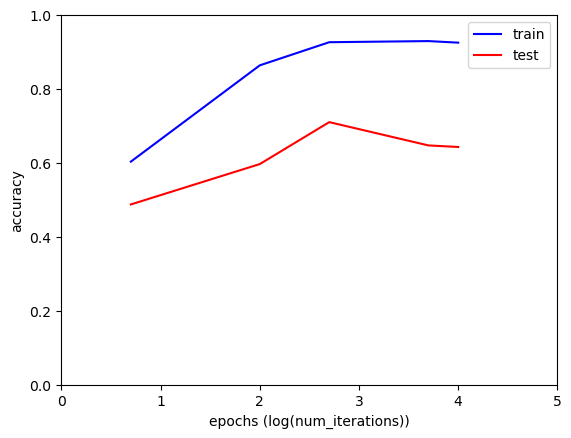

In [65]:
import matplotlib. pyplot as plt
epochs = np.array([0.7 , 2 , 2.7 , 3.7 , 4]) #5 , 100 , 500 , 5000 , 10000 epochs
epochAccuracyTrain = np.array([train_accuracy_verysmall_epoch , train_accuracy_small_epoch , train_accuracy , train_accuracy_big_epoch , train_accuracy_verybig_epoch])
epochAccuracyTest = np.array([test_accuracy_verysmall_epoch , test_accuracy_small_epoch , test_accuracy , test_accuracy_big_epoch , test_accuracy_verybig_epoch])
plt.plot(epochs , epochAccuracyTrain , color='Blue')
plt.plot(epochs , epochAccuracyTest , color='Red')
plt.xlim(0,5)
plt.ylim(0,1)
plt.xlabel('epochs (log(num_iterations))') 
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

#### نمودار دقت بر حسب تعداد ایپاک ها را میبینیم که البته از ایپاک ها لوگ گرفته شده تا نمودار بهتر نشان داده شود. توجه شود که ما نمونه های کمی داریم که در 5 مورد تست شده اند به همین دلیل نمودار رسم شده تقریبی هست و اگر تعداد نمونه های ازمایشی را بیشتر کنیم دقیقتر هم میشود. در این نمودار متوجه میشویم که با افزایش تعداد ایپاک ، دقت داده های اموزش و تست هم زیاد شده اما این روند تا جایی ادامه دارد و دیگر دقت با سرعت خیلی کمتری رشد میکند و حتی به جایی هم میرسد که اگر از ان نقطه به بعد تعداد ایپاک ها را زیاد کنیم روند نزولی را در دقت داده ها به ویژه در داده های تست شاهد هستیم و مدل رو به اورفیت شدن میرود یعنی اختلاف دقت داده های اموزش و تست بیشتر و بیشتر میشود و دقت داده های تست شیب نزولی پیدا میکنند. همچنین در مورد نمودار دقت بر حسب نرخ یادگیری هم توضیحات به همین صورت هست و در نمودار زیر مشاهده میشود

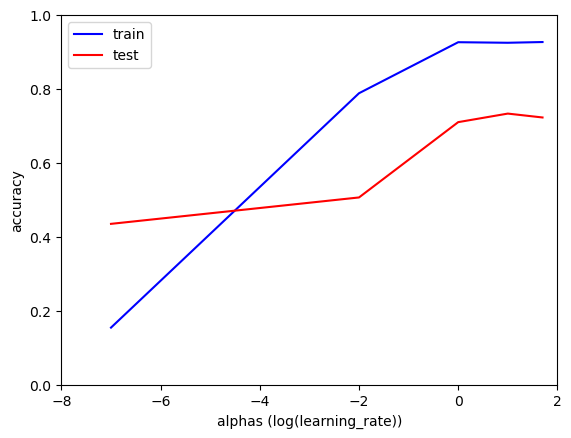

In [66]:
alphas = np.array([-7 , -2 , 0 , 1 , 1.7]) #0.0000001 , 0.01 , 1 , 10 , 50 alphas
alphaAccuracyTrain = np.array([train_accuracy_verysmall_alpha , train_accuracy_small_alpha , train_accuracy , train_accuracy_big_alpha , train_accuracy_verybig_alpha])
alphaAccuracyTest = np.array([test_accuracy_verysmall_alpha , test_accuracy_small_alpha , test_accuracy , test_accuracy_big_alpha , test_accuracy_verybig_alpha])
plt.plot(alphas , alphaAccuracyTrain , color='Blue')
plt.plot(alphas , alphaAccuracyTest , color='Red')
plt.xlim(-8,2)
plt.ylim(0,1)
plt.xlabel('alphas (log(learning_rate))') 
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

# نمودار خطا (هزینه) در هر دو حالت

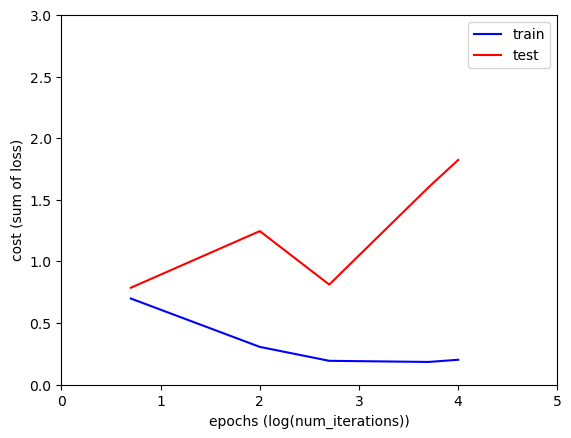

In [67]:
epochs = np.array([0.7 , 2 , 2.7 , 3.7 , 4]) #5 , 100 , 500 , 5000 , 10000 epochs
epochCostTrain = np.array([y_tr_cost_verysmall_epoch , y_tr_cost_small_epoch , y_tr_cost , y_tr_cost_big_epoch , y_tr_cost_verybig_epoch])
epochCostTest = np.array([y_pred_cost_verysmall_epoch , y_pred_cost_small_epoch , y_pred_cost , y_pred_cost_big_epoch , y_pred_cost_verybig_epoch])
plt.plot(epochs , epochCostTrain , color='Blue')
plt.plot(epochs , epochCostTest , color='Red')
plt.xlim(0,5)
plt.ylim(0,3)
plt.xlabel('epochs (log(num_iterations))') 
plt.ylabel('cost (sum of loss)')
plt.legend(['train','test'])
plt.show()

#### نمودار هزینه (مجموع خطاها) بر حسب تعداد ایپاک ها را میبینیم که البته از ایپاک ها لوگ گرفته شده تا نمودار بهتر نشان داده شود. توجه شود که ما نمونه های کمی داریم که در 5 حالت نمونه برداری شده به همین دلیل نمودار رسم شده تقریبی هست و اگر تعداد نمونه های ازمایشی را بیشتر کنیم دقیقتر هم میشود. این نمودار تا حدودی عکس نمودار دقت هست و در اینجا با افزایش تعداد ایپاک ، خطای داده های اموزش کم شده اما این روند تا جایی ادامه دارد و به جایی میرسد که اگر از ان نقطه به بعد تعداد ایپاک ها را زیاد کنیم خطا روند صعودی به خود گرفته و بیشتر هم میشود به خصوص برای داده های تست و با زیاد شدن بیش از حد تعداد ایپاک مدل رو به اورفیت شدن میرود زیرا خطای تست زیاد میشود و خطای اموزش کم هست و در واقع نمودار خطای داده تست فاصله زیادی با نمودار خطای اموزش پیدا میکند. همچنین در مورد نمودار هزینه بر حسب نرخ یادگیری هم توضیحات به شبیه به همین هست و در نمودار زیر مشاهده میشود
#### در نمودار بالا میبینیم که مدل در حالتی که محور ایکس 2.7 باشد یعنی ایپاک 500 باشد نمودار خطای اموزش و تست به هم نزدیک هستند و هر دو مقدار کمی دارند از این رو مدل با این تعداد ایپاک ، مدل خوبی هست. اگر ایپاک زیاد شود خطای نمودار اموزش تقریبا همان هست و اندکی زیاد شده است اما خطای تست بسیار زیاد شده از این رو مدل به سوی اورفیت شدن حرکت میکند. در ابتدای کار هم نمودار اموزش خطای زیادی دارد و به نوعی مدل اندرفیت هست که اموزش و تست خطای کمی ندارند که قابل قبول باشد.
#### در نمودار پایین هم میبینیم که در حالتیکه محور ایکس برابر 0 باشد یعنی آلفا برابر 1 باشد نمودار خطای اموزش و تست به هم نزدیک هستند و مقدار کمی دارند از این رو مدل مناسبی هست. همچنین حالت الفا برابر یک صدم هم نسبتا حالت مناسبی میتواند باشد. اما وقتی که نرخ یادگیری خیلی خیلی کم باشد تاثیرش خیلی کم است در نتیجه مدل اندرفیت هست و اموزش و تست خطای زیادی دارند و فرایند به صورت اهسته پیشرفت میکند. از طرفی اگر نرخ یادگیری خیلی زیاد باشد خطای داده اموزش مقدار کمی بیشتر از حالت مطلوب شده اما خطای تست بسیار زیاد شده و مدل اورفیت میشود

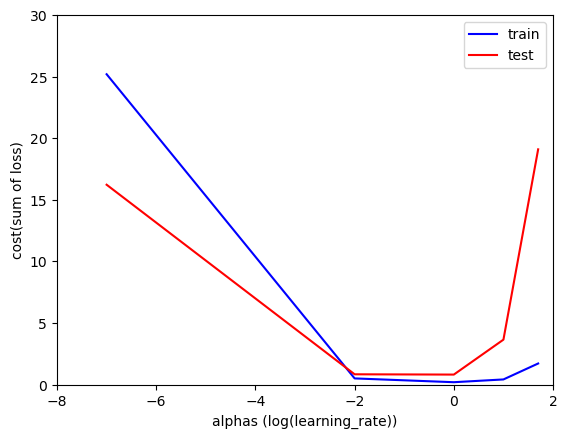

In [68]:
alphas = np.array([-7 , -2 , 0 , 1 , 1.7]) #0.0000001 , 0.01 , 1 , 10 , 50 alphas
alphaCostTrain = np.array([y_tr_cost_verysmall_alpha , y_tr_cost_small_alpha , y_tr_cost , y_tr_cost_big_alpha , y_tr_cost_verybig_alpha])
alphaCostTest = np.array([y_pred_cost_verysmall_alpha , y_pred_cost_small_alpha , y_pred_cost , y_pred_cost_big_alpha , y_pred_cost_verybig_alpha])
plt.plot(alphas , alphaCostTrain , color='Blue')
plt.plot(alphas , alphaCostTest , color='Red')
plt.xlim(-8,2)
plt.ylim(0,30)
plt.xlabel('alphas (log(learning_rate))') 
plt.ylabel('cost(sum of loss)')
plt.legend(['train','test'])
plt.show()

#### نمودارهای دیگری هم بر حسب پارامترهای دیگر میتوان رسم کرد مثلا نمودار تعداد ایپاک چه رابطه ای با میزان عملکرد مدل دارد که نشان میدهد که افزایش ایپاک تا حد مناسبی میتواند  عملکرد مدل را خیلی بالا ببرد اما از جایی به بعد دیگر افزایش ایپاک ناکارامد میشود و مقدار معیار عملکرد مدل پایین می اید و یا نمودارهای بالا را بر حسب میزان خطا (لاس) رسم کرد

#### همچنین باید توجه شود که تعداد نمونه ها در نمودارها کم هست و به همین دلیل نمودارها تقریبی هست همچنین مقدار اولیه وزن ها هم به صورت رندوم داده میشوند به همین دلیل در هر حالتی ممکن است وزن ها مقدار متفاوتی در ابتدای کار داشته باشند به همین منظور ممکن است مثلا در نمودار دقت و تعداد ایپاک ، با افزایش ایپاک و بیشتر کردن ان نسبت به حالت متعادل ، دقت خیلی کم نشود یا حتی مقدار کمی زیاد شود اما نکته اصلی این است که قطعا مقدار این افزایش دقت با زیاد شدن تعداد ایپاک قطعا کم و کمتر میشود و اگر دقت زیاد شود هم به مقدار ناچیزی زیاد میشود و البته بالاخره به جایی میرسد که  روند نزولی هم به خود گیرد و دقت کمتر شود